In [1]:
import sys
sys.path.append("../../")
DATA_PATH = "../../data/"
SAVE_PATH = "../../plots"

import abm_py as abm
import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *
from py_common.scattering_dependence import ScatteringDependence

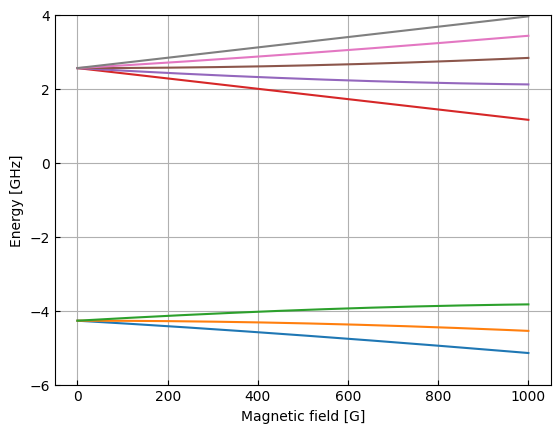

In [6]:
rb = abm.HifiProblemBuilder(1, 3)
rb.with_hyperfine_coupling(0.113990 * CMINV)

mag_fields = np.linspace(0, 1000, 500)
states = np.array(rb.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states)
ax.set_ylim(-6, 4)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Energy [GHz]");

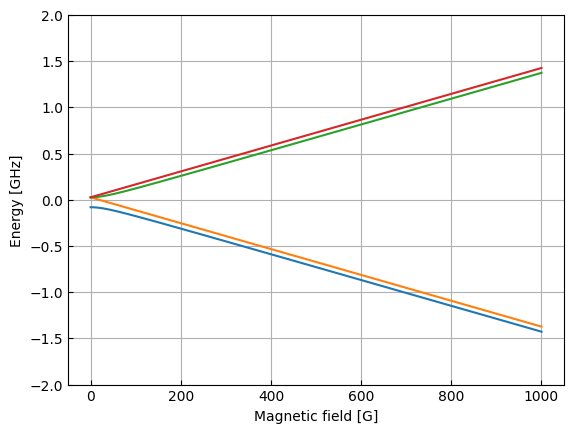

In [7]:
srf = abm.HifiProblemBuilder(1, 1)
srf.with_hyperfine_coupling((3.2383e-3 + 1.0096e-3 / 3.) * CMINV)

mag_fields = np.linspace(0, 1000, 500)
states = np.array(srf.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states)
ax.set_ylim(-2, 2)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Energy [GHz]");

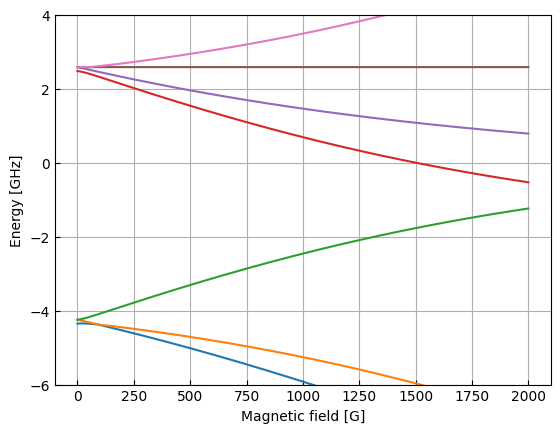

In [8]:
srf_rb = abm.DoubleHifiProblemBuilder(srf, rb)
srf_rb.with_projection(-2)

mag_fields = np.linspace(0, 2000, 500)
states = np.array(srf_rb.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states)
ax.set_ylim(-6, 4)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel("Energy [GHz]");

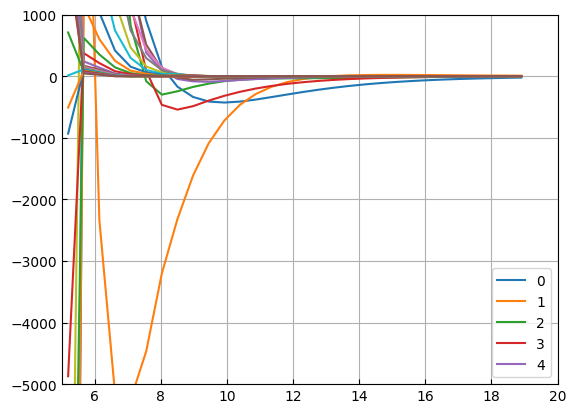

In [2]:
data = utility.load(f"{DATA_PATH}/SrF_Rb_triplet_dec.dat")
distances = data[:, 0]
values_legendre = data[:, 1:]

fig, ax = utility.plot()
ax.plot(distances, values_legendre / CMINV)
ax.legend([str(i) for i in range(5)])

ax.set_xlim(5, 20)
ax.set_ylim(-5000, 1000);

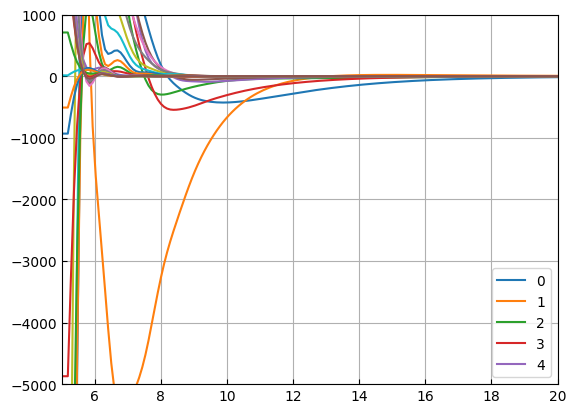

In [3]:
data = utility.load(f"{DATA_PATH}/SrF_Rb_triplet_dec_interpolated.dat")
distances = data[:, 0]
values_legendre = data[:, 1:]

fig, ax = utility.plot()
ax.plot(distances, values_legendre / CMINV)
ax.legend([str(i) for i in range(5)])

ax.set_xlim(5, 20)
ax.set_ylim(-5000, 1000);

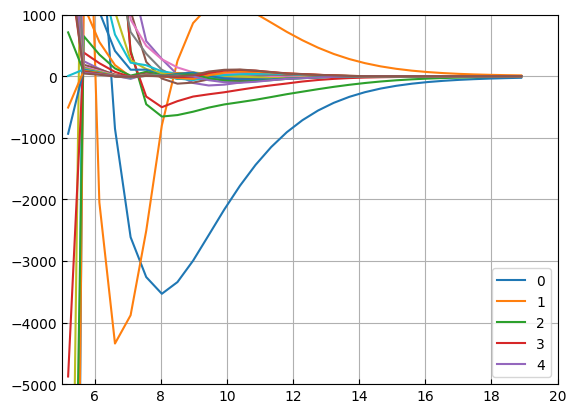

In [4]:
data = utility.load(f"{DATA_PATH}/SrF_Rb_singlet_dec.dat")
distances = data[:, 0]
values_legendre = data[:, 1:]

fig, ax = utility.plot()
ax.plot(distances, values_legendre / CMINV)
ax.legend([str(i) for i in range(5)])

ax.set_xlim(5, 20)
ax.set_ylim(-5000, 1000);

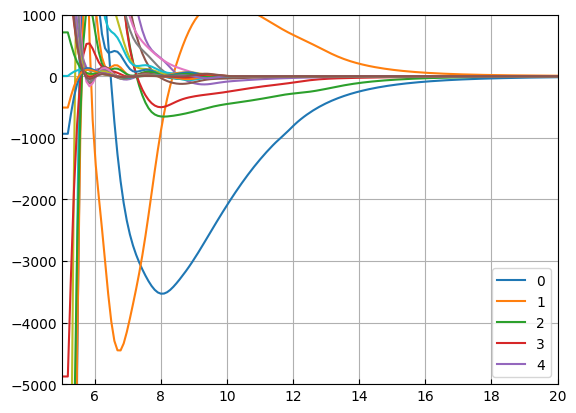

In [14]:
data = utility.load(f"{DATA_PATH}/SrF_Rb_singlet_dec_interpolated.dat")
distances = data[:, 0]
values_legendre = data[:, 1:]

fig, ax = utility.plot()
ax.plot(distances, values_legendre / CMINV)
ax.legend([str(i) for i in range(5)])

ax.set_xlim(5, 20)
ax.set_ylim(-5000, 1000);

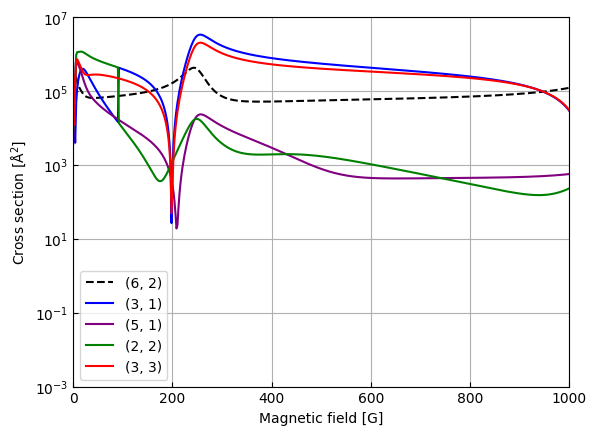

In [26]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings_n_0.json")

fig, ax = utility.plot()
ax.plot(data.parameters, data.elastic_cross_sections() / ANGS**2, linestyle = "--", color = "black", label = "(6, 2)")
ax.plot(data.parameters, 0.001 * data.inelastic_cross_sections(0) / ANGS**2, color = "blue", label = "(3, 1)")
ax.plot(data.parameters, 0.005 * data.inelastic_cross_sections(3) / ANGS**2, color = "purple", label = "(5, 1)")
ax.plot(data.parameters, 0.001 * data.inelastic_cross_sections(1) / ANGS**2, color = "green", label = "(2, 2)")
ax.plot(data.parameters, 0.001 * data.inelastic_cross_sections(2) / ANGS**2, color = "red", label = "(3, 3)")

ax.set_yscale("log")
ax.set_ylim(1e-3, 1e7)
ax.set_xlim(0, 1000)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel(r"Cross section [Å$^2$]")
ax.legend();

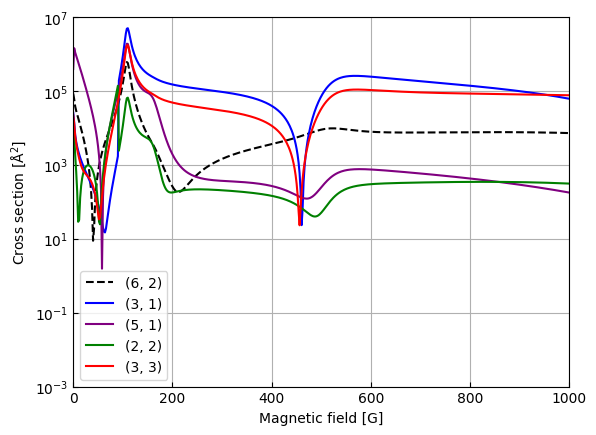

In [27]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings.json")

fig, ax = utility.plot()
ax.plot(data.parameters, data.elastic_cross_sections() / ANGS**2, linestyle = "--", color = "black", label = "(6, 2)")
ax.plot(data.parameters, 0.001 * data.inelastic_cross_sections(0) / ANGS**2, color = "blue", label = "(3, 1)")
ax.plot(data.parameters, 0.005 * data.inelastic_cross_sections(3) / ANGS**2, color = "purple", label = "(5, 1)")
ax.plot(data.parameters, 0.001 * data.inelastic_cross_sections(1) / ANGS**2, color = "green", label = "(2, 2)")
ax.plot(data.parameters, 0.001 * data.inelastic_cross_sections(2) / ANGS**2, color = "red", label = "(3, 3)")

ax.set_yscale("log")
ax.set_ylim(1e-3, 1e7)
ax.set_xlim(0, 1000)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel(r"Cross section [Å$^2$]")
ax.legend();

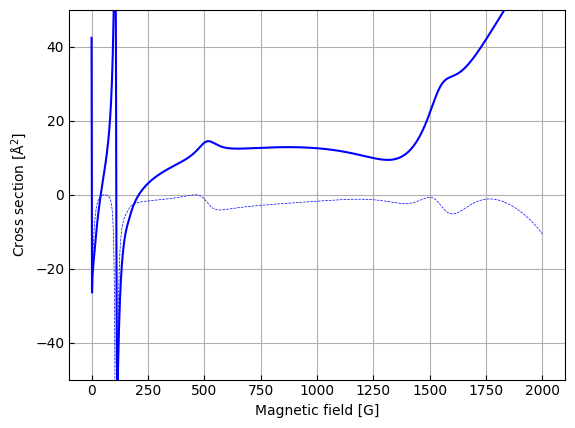

In [33]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings.json")

fig, ax = utility.plot()
ax.plot(data.parameters, data.s_lengths().real / ANGS**2, color = "blue")
ax.plot(data.parameters, data.s_lengths().imag / ANGS**2, color = "blue", linestyle="--", linewidth = 0.5)

ax.set_ylim(-50, 50)
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel(r"Cross section [Å$^2$]");